<h2 align="center"> Logistic Regression </h2>

Load the Data and Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data=pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
scores=data[['DMV_Test_1','DMV_Test_2']].values

results=data['Results'].values

Visualize the Data


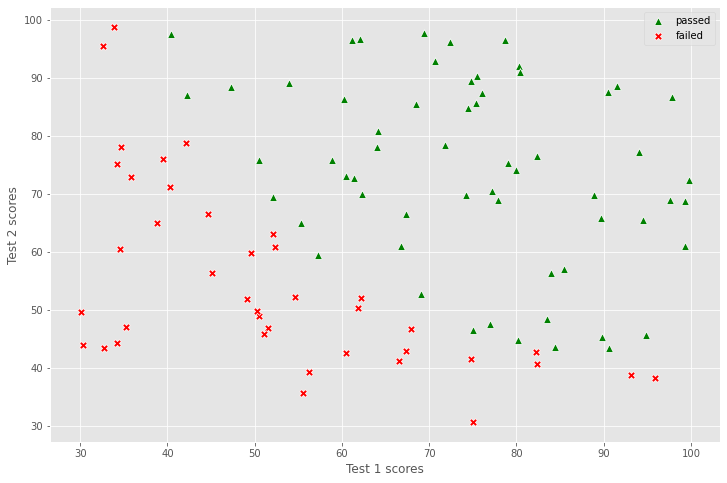

In [6]:
passed =(results==1).reshape(100,1)
failed =(results==0).reshape(100,1)
ax=sns.scatterplot(x=scores[passed[:,0],0],y=scores[passed[:,0],1],marker="^",color='green',s=60)
sns.scatterplot(x=scores[failed[:,0],0],y=scores[failed[:,0],1],marker="X",color='red',s=60)
ax.set(xlabel="Test 1 scores",ylabel="Test 2 scores")
ax.legend(['passed','failed'])

Define the Logistic Sigmoid Function 


In [7]:
def logistic_function(x):
    return 1/(1+np.exp(-x))

In [8]:
logistic_function(0)

0.5

 Compute the Cost Function and Gradien

In [9]:
def compute_cost(theta,x,y):
    m=len(y)
    y_pred=logistic_function(np.dot(x,theta))
    error=(y*np.log(y_pred))+(1-y)*np.log(1-y_pred)
    cost=-1/m*sum(error)
    gradient=1/m*np.dot(x.transpose(),(y_pred-y))
    return cost[0],gradient

Cost and Gradient at Initialization


In [10]:
mean_scores=np.mean(scores,axis=0)
std_scores=np.std(scores,axis=0)
scores=(scores-mean_scores)/std_scores
rows=scores.shape[0]
cols=scores.shape[1]

X=np.append(np.ones((rows,1)),scores,axis=1)
y=results.reshape(rows,1)
theta_init=np.zeros((cols+1,1))
cost,gradient=compute_cost(theta_init,X,y)
print("cost at initial",cost)
print("gradient descent at initial",gradient)

cost at initial 0.693147180559946
gradient descent at initial [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Gradient Descentz


In [11]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient=compute_cost(theta,x,y)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta,costs

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [12]:
theta,costs=gradient_descent(X,y,theta_init,1,200)
print("after running descent",theta)
print("resulting cost",costs[-1])

after running descent [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
resulting cost 0.2048938203512014


 Plotting the Convergence 
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'values of cost function')

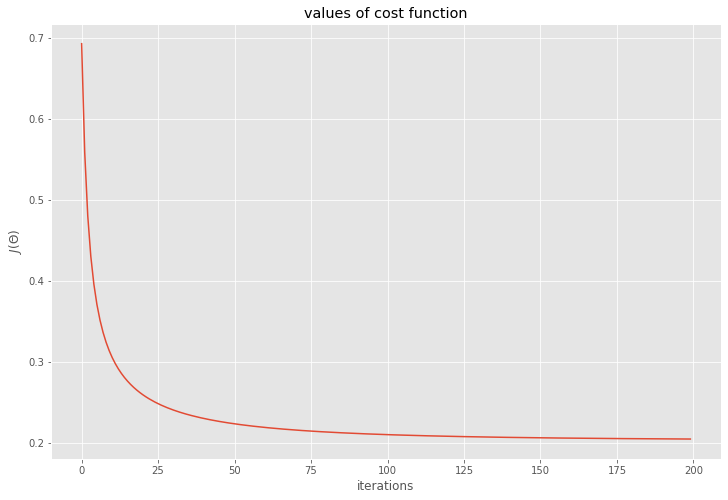

In [13]:
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")
plt.title("values of cost function")

Plotting the decision boundary


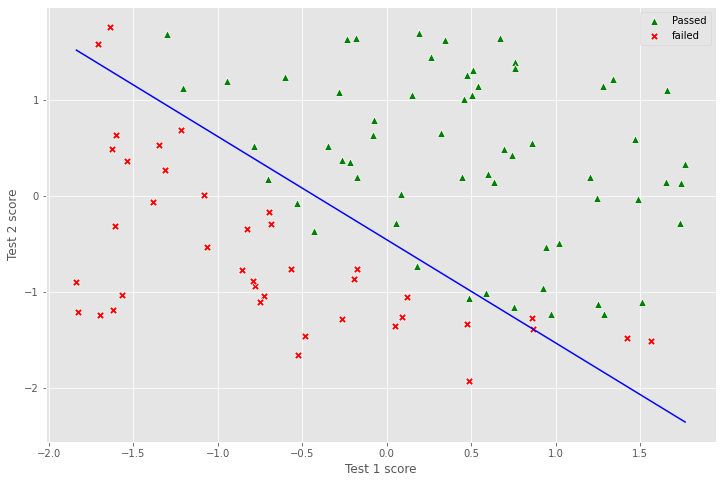

In [14]:
ax=sns.scatterplot(x=X[passed[:,0],1],y=X[passed[:,0],2],marker="^",color='green',s=60)
sns.scatterplot(x=X[failed[:,0],1],y=X[failed[:,0],2],marker="X",color='red',s=60)
ax.legend(['Passed','failed'])
ax.set(xlabel="Test 1 score",ylabel="Test 2 score")

x_boundary=np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary=-(theta[0]+theta[1]*x_boundary)/theta[2]

sns.lineplot(x=x_boundary,y=y_boundary,color="blue")
plt.show()

Predictions using the optimized theta value


In [15]:
def predict(theta,x):
    results=x.dot(theta)
    return results>0

In [16]:
p=predict(theta,X)
print("accuracy",sum(p==y)[0],"%")

accuracy 89 %


In [18]:
test=np.array([50,79])
trst=(test-mean_scores)/std_scores
test=np.append(np.ones(1),test)
probability=logistic_function(test.dot(theta))
print("person passed or failed",probability)

person passed or failed [1.]
